In [32]:
import copy
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def phi(t,mu,a,b,c):
    return mu*pow((t - a), 2) + abs(t-b) +  abs(t-c)

In [34]:
def generic_gs_phi(phi,l,u,eps,mu,a,b,c):
    tao = (3-np.sqrt(5)) / 2
    x2 = l + tao*(u-l)
    x3 = l + (1-tao)*(u-l)
    while np.abs(u - l) >= eps:
        if phi(x2,mu,a,b,c)<phi(x3,mu,a,b,c):
            u=x3
            x3=x2
            x2 = l + tao*(u-l)
        else:
            l=x2
            x2 = x3
            x3 = l + (1-tao)*(u-l)
    return l

In [35]:
def gs_denoise_step(mu,a,b,c):
    if mu<=0:
        print("WARNING:")
        return None
    u = max(a,b,c)+1
    l = min(a,b,c)-1
    eps = pow(10,-10)
    return generic_gs_phi(phi,l,u,eps,mu,a,b,c)


In [36]:
def gs_denoise(s,alpha,N):
    x = copy.deepcopy(s)
    n = len(x)
    for i in range(N):
        for k in range(n):
            if k==0:
                x[k] = gs_denoise_step(2*alpha,s[0],x[1],x[1])
            elif k==n-1:
                x[k] = gs_denoise_step(2*alpha,s[n-1],x[n-2],x[n-2])
            else:
                x[k] = gs_denoise_step(alpha,s[k],x[k-1],x[k+1])
    return x

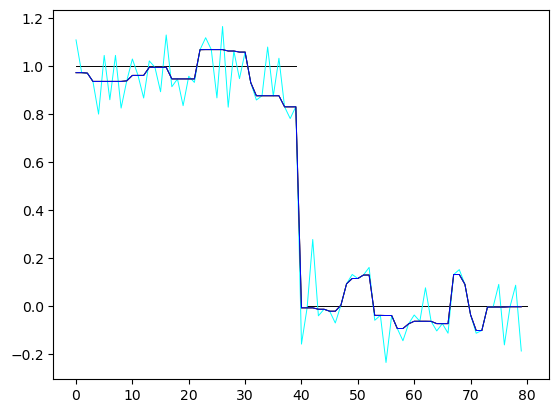

In [43]:
# plotting the real discrete signal
real_s_1 = [1.]*40
real_s_0 = [0.]*40

plt.plot(range(40), real_s_1, 'black', linewidth=0.7)
plt.plot(range(41, 81), real_s_0, 'black', linewidth=0.7)


# solving the problem
s = np.array([[1.]*40 + [0.]*40]).T + 0.1*np.random.randn(80, 1) # noised signal
x1 = gs_denoise(s, 0.5, 10)
x2 = gs_denoise(s, 0.5, 20)
x3 = gs_denoise(s, 0.5, 30)

plt.plot(range(80), s, 'cyan', linewidth=0.7)
plt.plot(range(80), x1, 'red', linewidth=0.7)
plt.plot(range(80), x2, 'green', linewidth=0.7)
plt.plot(range(80), x3, 'blue', linewidth=0.7)

plt.show()